# Problem Statement
- objective:
The goal of this project is to develop a robust churn prediction model that accurately identifies customers at risk of leaving the bank. Additionally, the model aims to uncover the underlying factors contributing to churn, enabling the bank to implement targeted strategies to improve customer satisfaction, enhance loyalty, and reduce attrition rates.

- output: 
The model will predict whether a customer is likely to churn and provide a probability score for each prediction. It will also identify and rank the key factors contributing to churn, offering actionable insights and visualizations to help the bank address customer attrition effectively.

In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for numerical computation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for visualization
# for model evaluation
from sklearn.model_selection import train_test_split # for data splitting
from sklearn.preprocessing import StandardScaler # for data scaling
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # for model evaluation
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
import shap
import xgboost as xgb
import lime
import lime.lime_tabular


# Data preparation( Data cleaning , Feature engineering, Data splitting )


data collection
data cleaning( removing , imputing, or constanf values)
handling outliers( remove, cap or adjust)
feature engineering

In [37]:
data =pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
data.duplicated().sum() # checking if we have duplicated values

0

In [39]:
data = data.drop(columns= "Exited")

In [40]:
data['HasCrCard'].astype(str)

0       1
1       0
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: HasCrCard, Length: 10000, dtype: object

In [41]:
data.isnull().sum() # check the empty cells
data.isna().sum()# check the na, nan values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [42]:
print(data['HasCrCard'].dtype)  # Check the data type


int64


In [43]:
data['HasCrCard']=data['HasCrCard'].astype(str)

In [44]:
data['HasCrCard']=data['HasCrCard'].replace('Y', '1')
data['HasCrCard']=data['HasCrCard'].replace('N', '0')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


# Exploratory Data Analysis

In [45]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
dtype: int64

In [46]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000


In [47]:
#data.sort_values(by="Age").head()
data.sort_values(by="Age", ascending=False).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6443,6444,15764927,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99
6759,6760,15660878,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83
2458,2459,15813303,Rearick,513,Spain,Male,88,10,0.00,2,1,1,52952.24
3033,3034,15578006,Yao,787,France,Female,85,10,0.00,2,1,1,116537.96
3387,3388,15798024,Lori,537,Germany,Male,84,8,92242.34,1,1,1,186235.98


In [ ]:
datacorr= data[["CreditScore",'Age','Balance','TenureInMonths','Balance','IsActiveMember','HasCrCard','EstimatedSalary']].corr()


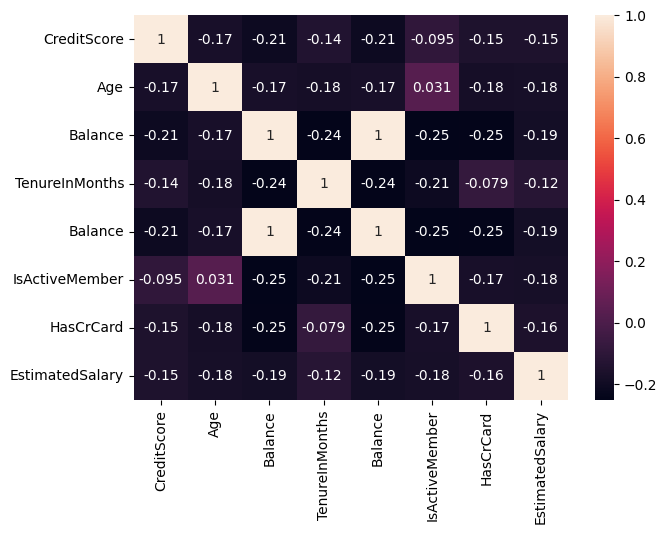

In [ ]:
sns.heatmap(datacorr.corr(), annot=True)
plt.rcParams['figure.figsize']= (7,7)
plt.show()

In [ ]:
data1=["CreditScore",'Age','Balance','TenureInMonths','Balance','IsActiveMember','HasCrCard','EstimatedSalary']
#data.groupby('Geography').mean(["CreditScore",'Age','Balance','TenureInMonths','Balance','IsActiveMember','HasCrCard','EstimatedSalary'])
data.groupby('Geography').mean(data1)

,RowNumber,CustomerId,CreditScore,Age,TenureInMonths,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
Geography,,,,,,,,,
France,5025.228560,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.516753,99899.180814
Germany,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.497409,101113.435102
Spain,4950.667743,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.529673,99440.572281


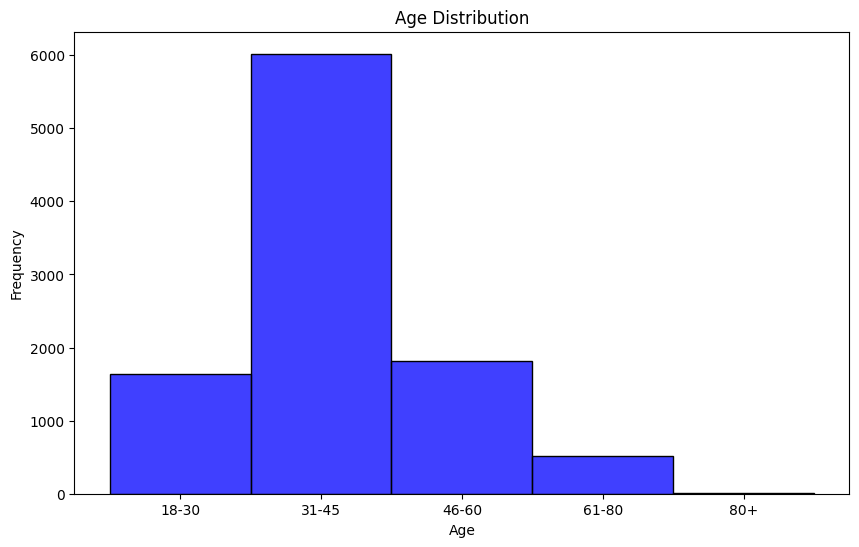

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=False, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\ntabi\AppData\Local\Temp\ipykernel_83264\406714009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Blues')


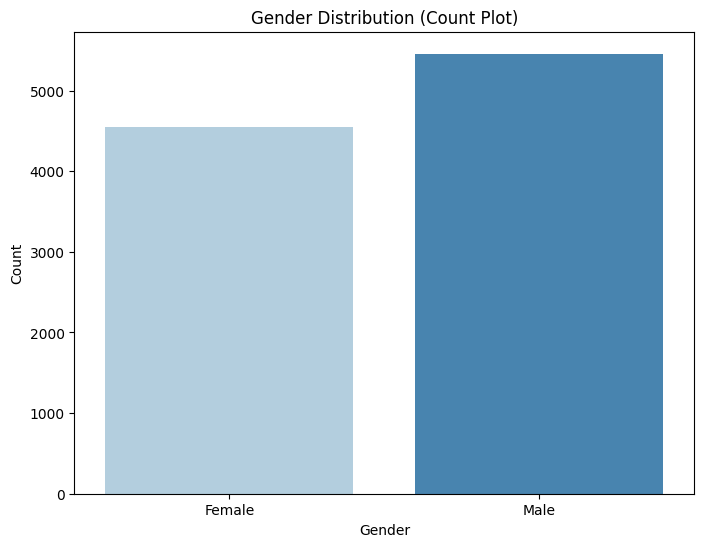

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Blues')
plt.title('Gender Distribution (Count Plot)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [58]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['Age'],name='Age Box Plot',boxmean=True)
tr2=go.Histogram(x=data['Age'],name='Age Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of Ages")
fig.show()

In [ ]:
data.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88


In [ ]:
ex.pie(data,names='Balance',title='Propotion Of Different Income Levels',hole=0.33)


In [51]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [53]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['Tenure'],name='Months on book Box Plot',boxmean=True)
tr2=go.Histogram(x=data['Tenure'],name='Months on book Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of months the customer is part of the bank")
fig.show()

In [57]:
fig = make_subplots(rows=2, cols=1)

# Box plot for 'NumOfProducts'
tr1 = go.Box(x=data['NumOfProducts'], name='Total no. of products Box Plot', boxmean=True)

# Histogram for 'NumOfProducts'
tr2 = go.Histogram(x=data['NumOfProducts'], name='Total no. of products Histogram')

# Add the traces to the appropriate subplots
fig.add_trace(tr1, row=1, col=1)
fig.add_trace(tr2, row=2, col=1)

# Update the layout of the figure
fig.update_layout(
    height=700, 
    width=1000, 
    title_text="Distribution of Total no. of products held by the customer"
)

# Display the plot
fig.show()


# Model Selection

# Model training and Testing

# Model evaluation

# Model explainability and Interpritation